In [125]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [126]:
from pathlib import Path

import pandas as pd

data = pd.read_csv("calibrate.csv", header=0)

data.head()

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
0,0.366211,-2.685547,-2.380371,-0.073023,-0.065841,-9.810242
1,0.305176,-2.624512,-2.319336,-0.068235,-0.057461,-9.817424
2,0.305176,-2.685547,-2.380371,-0.082600,-0.056264,-9.788693
3,0.244141,-2.746582,-2.441406,-0.077812,-0.047884,-9.797073
4,0.305176,-2.746582,-2.319336,-0.082600,-0.049081,-9.819819


In [127]:
from imucal import ferraris_regions_from_interactive_plot

regions, section_list = ferraris_regions_from_interactive_plot(data)
section_list.to_json("section_list.json")

In [128]:
from imucal import ferraris_regions_from_section_list

section_list = pd.read_json("section_list.json")

section_list

,start,end
x_p,1600,2531
x_a,3751,4763
y_p,5566,6529
y_a,7412,8167
z_p,9499,10639
z_a,12084,13048
x_rot,14467,15108
y_rot,17374,17763
z_rot,19284,19770


In [129]:
regions = ferraris_regions_from_section_list(data, section_list)
regions

FerrarisSignalRegions(acc_x_p=array([[ 9.840169  ,  0.4177882 , -0.04668693],
       [ 9.818622  ,  0.427365  , -0.04429273],
       [ 9.78989   ,  0.4213795 , -0.04309563],
       ...,
       [ 9.8198185 ,  0.40102878, -0.04429273],
       [ 9.80665   ,  0.40940848, -0.04788403],
       [ 9.8198185 ,  0.41060558, -0.04668693]]), acc_x_a=array([[-9.79827   , -0.48243165,  0.34117374],
       [-9.776723  , -0.46686932,  0.35913026],
       [-9.7958765 , -0.46686932,  0.35194764],
       ...,
       [-9.770737  , -0.47405192,  0.3878607 ],
       [-9.770737  , -0.47764325,  0.39145198],
       [-9.8042555 , -0.47046062,  0.39983168]]), acc_y_p=array([[-0.05506664,  9.682152  ,  0.01436521],
       [-0.05027823,  9.702502  ,  0.03112462],
       [-0.05506664,  9.692925  ,  0.03711013],
       ...,
       [-0.06105214,  9.662998  ,  0.04548983],
       [-0.05147533,  9.677363  ,  0.02753332],
       [-0.04429273,  9.697714  ,  0.02035071]]), acc_y_a=array([[ 0.24061728, -9.82341   ,  0.283

In [130]:
from imucal import FerrarisCalibration

cal = FerrarisCalibration()
cal_info = cal.compute(
    regions, sampling_rate_hz=100, from_acc_unit="m/s^2", from_gyr_unit="deg/s", comment="FRA333_lab3"
)

In [131]:
folder = "info"
cal_info.to_json_file("arduino_imu.json")

In [132]:
from imucal.management import save_calibration_info
from datetime import datetime

file_path = save_calibration_info(
    cal_info, sensor_id="arduinoimu", cal_time=datetime(2022, 11, 23, 0, 0), folder=Path(folder)
)
file_path

PosixPath('info/arduinoimu/Ferraris/arduinoimu_2022-11-23_00-00.json')

In [133]:
Path(folder)

PosixPath('info')

In [134]:
from imucal.management import find_calibration_info_for_sensor

cals = find_calibration_info_for_sensor("arduinoimu", Path(folder))
cals

[PosixPath('info/arduinoimu/Ferraris/arduinoimu_2022-11-23_00-00.json')]

In [135]:
cals[0]

PosixPath('info/arduinoimu/Ferraris/arduinoimu_2022-11-23_00-00.json')

In [136]:
from imucal.management import load_calibration_info

loaded_cal_info = load_calibration_info(cals[0])
print(loaded_cal_info.to_json())

{
    "acc_unit": "m/s^2",
    "gyr_unit": "deg/s",
    "from_acc_unit": "m/s^2",
    "from_gyr_unit": "deg/s",
    "comment": "FRA333_lab3",
    "K_a": [
        [
            0.9997839536587397,
            0.0,
            0.0
        ],
        [
            0.0,
            0.9966295703938612,
            0.0
        ],
        [
            0.0,
            0.0,
            0.997553815060167
        ]
    ],
    "R_a": [
        [
            0.9996145775714235,
            -0.01416770575316752,
            0.02387409517440021
        ],
        [
            0.045064757577865815,
            0.9989543099308069,
            0.007710661133354341
        ],
        [
            -0.020583781652249528,
            -0.012287317461617858,
            0.999712623588644
        ]
    ],
    "b_a": [
        0.018200879087628685,
        -0.07957220642789853,
        -0.06460936503967396
    ],
    "K_g": [
        [
            0.8939213221945881,
            0.0,
            0.0
      

In [137]:
calibrated_data = loaded_cal_info.calibrate_df(data, "m/s^2", "deg/s")

In [138]:
data

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
0,0.366211,-2.685547,-2.380371,-0.073023,-0.065841,-9.810242
1,0.305176,-2.624512,-2.319336,-0.068235,-0.057461,-9.817424
2,0.305176,-2.685547,-2.380371,-0.082600,-0.056264,-9.788693
3,0.244141,-2.746582,-2.441406,-0.077812,-0.047884,-9.797073
4,0.305176,-2.746582,-2.319336,-0.082600,-0.049081,-9.819819
...,...,...,...,...,...,...
19995,0.427246,-2.563477,-2.990723,0.520739,-0.063446,9.720459
19996,0.427246,-2.685547,-2.929688,0.518345,-0.073023,9.751583
19997,0.366211,-2.563477,-2.929688,0.505177,-0.056264,9.716867
19998,0.366211,-2.685547,-2.929688,0.502782,-0.047884,9.762358


In [139]:
new_data = [0.506392,-0.057524,-0.049002,9.804256,-0.044293,-0.414197]

In [140]:
data.columns

Index(['gyr_x', 'gyr_y', 'gyr_z', 'acc_x', 'acc_y', 'acc_z'], dtype='object')

In [141]:
newdf = pd.DataFrame([new_data], columns=data.columns)
newdf

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
0,0.506392,-0.057524,-0.049002,9.804256,-0.044293,-0.414197


In [142]:
calibrated_data = loaded_cal_info.calibrate_df(data, "m/s^2", "deg/s")
calibrated_data

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
0,0.139885,-0.196755,1.053252,0.143195,0.082732,-9.768374
1,0.075265,-0.126963,1.123836,0.148270,0.090974,-9.775370
2,0.071256,-0.197290,1.050199,0.133238,0.092634,-9.746849
3,-0.000843,-0.267717,0.973511,0.138342,0.100884,-9.755046
4,0.072704,-0.268020,1.117269,0.134086,0.100051,-9.777951
...,...,...,...,...,...,...
19995,-0.038253,-0.042671,0.750125,0.267374,-0.071635,9.816508
19996,-0.038855,-0.183734,0.815518,0.264100,-0.081346,9.847530
19997,-0.104157,-0.043571,0.817070,0.252007,-0.063698,9.812687
19998,-0.107316,-0.184448,0.811872,0.248637,-0.055482,9.858334


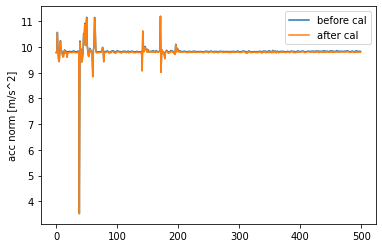

In [145]:
import matplotlib.pyplot as plt
from numpy.linalg import norm

plt.figure()
plt.plot(norm(data.filter(like="acc"), axis=1)[500:1000], label="before cal")
plt.plot(norm(calibrated_data.filter(like="acc")[500:1000], axis=1), label="after cal")
plt.legend()
plt.ylabel("acc norm [m/s^2]")
plt.show()